In [3]:
%%capture
%run ./calculations_kufstein_imst.ipynb
%run ./calculations.ipynb
%run ./plots.ipynb

#%run D:/codes/calculations_kufstein_imst.ipynb
#%run D:/codes/calculations.ipynb
#%run D:/codes/plots.ipynb

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
only_model = ['WRF','AROME','UM','ICON','ICON2TE']
labels = ["WRF", "AROME", "UM", "ICON", "ICON2TE"]
colours=[colordict['WRF_ACINN'], colordict['AROME'], colordict['UKMO'], colordict['ICON'], 'm']
formen=['*','+','x','<','^']
colours_obs=[colordict['RADIOSONDE'], colordict['WRF_ACINN'], colordict['AROME'], colordict['UKMO'], colordict['ICON'], 'm']
formen_obs=['o','*','+','x','<','^']

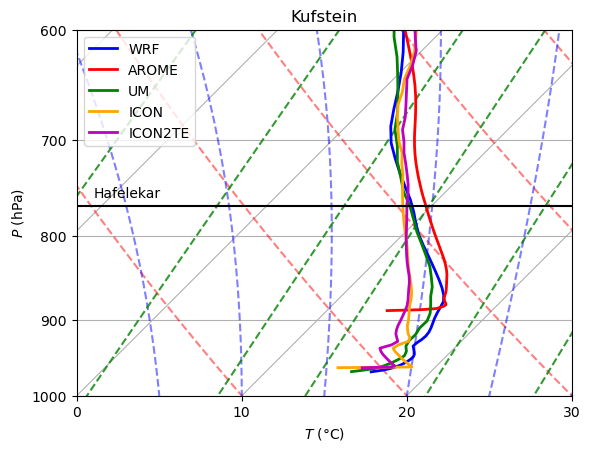

In [8]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45, rect=(0.1, 0.1, 0.55, 0.85))

skew.plot(df_wrf_k["pressure"].values, df_wrf_k["temperature"].values, color=colordict["WRF_ACINN"], label="WRF",linewidth=2)

skew.plot(df_arome_k["pressure"].values, df_arome_k["temperature"].values, color=colordict["AROME"], label="AROME", linewidth=2)

skew.plot(data_ukmo_k["pressure"].values, data_ukmo_k["temperature"].values, color=colordict["UKMO"],label="UM", linewidth=2)

skew.plot(df_icon_k["pressure"].values, df_icon_k["temp"].values-273.15, color=colordict["ICON"], label="ICON", linewidth=2)

skew.plot(df_icon2TE_k["pressure"].values, df_icon2TE_k["temp"].values-273.15, color='m', label="ICON2TE", linewidth=2)


skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

skew.ax.set_xlabel('$T$ (°C)')
skew.ax.set_ylabel('$P$ (hPa)')
skew.ax.set_xlim(0, 30)
skew.ax.set_ylim(1000, 600)
skew.ax.set_title('Kufstein')
#change size of fig
skew.ax.set_aspect(100)

skew.ax.axhline(y=p_seg, color='k')
#skew.ax.axhline(y=p_surf[0], color='k')
#skew.ax.text(-1, k_p_surf[0]-10, 'Surface')
skew.ax.text(-11, p_seg -10, 'Hafelekar')
#skew.ax.axhline(y=df_obs.pressure[81].values, color='k')
#skew.ax.margins(y=10)
plt.legend(loc=2);
plt.savefig(dir_PLOTS + "k_i/skew_t_k.svg")
plt.savefig(dir_PLOTS + "k_i/skew_t_k.png")


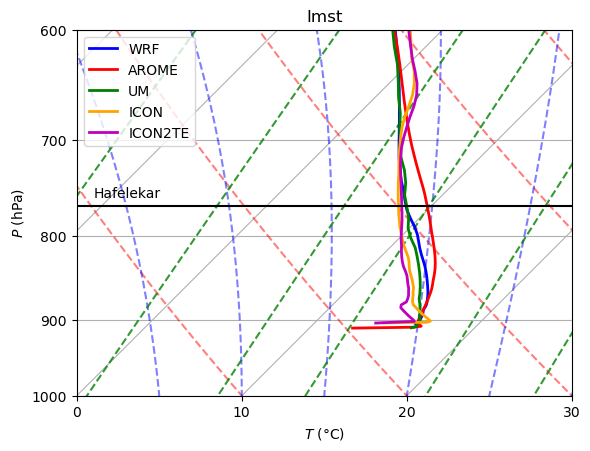

In [9]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45, rect=(0.1, 0.1, 0.55, 0.85))

skew.plot(df_wrf_i["pressure"].values, df_wrf_i["temperature"].values, color=colordict["WRF_ACINN"], label="WRF",linewidth=2)

skew.plot(df_arome_i["pressure"].values, df_arome_i["temperature"].values, color=colordict["AROME"], label="AROME", linewidth=2)

skew.plot(data_ukmo_i["pressure"].values, data_ukmo_i["temperature"].values, color=colordict["UKMO"],label="UM", linewidth=2)

skew.plot(df_icon_i["pressure"].values, df_icon_i["temp"].values-273.15, color=colordict["ICON"], label="ICON", linewidth=2)

skew.plot(df_icon2TE_i["pressure"].values, df_icon2TE_i["temp"].values-273.15, color='m', label="ICON2TE", linewidth=2)


skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

skew.ax.set_xlabel('$T$ (°C)')
skew.ax.set_ylabel('$P$ (hPa)')
skew.ax.set_xlim(0, 30)
skew.ax.set_ylim(1000, 600)

#change size of fig
skew.ax.set_aspect(100)
skew.ax.set_title('Imst')

skew.ax.axhline(y=p_seg, color='k')
#skew.ax.axhline(y=p_surf[0], color='k')
#skew.ax.text(-1, k_p_surf[0]-10, 'Surface')
skew.ax.text(-11, p_seg -10, 'Hafelekar')
#skew.ax.axhline(y=df_obs.pressure[81].values, color='k')
#skew.ax.margins(y=10)
plt.legend(loc=2);
plt.savefig(dir_PLOTS + "k_i/skew_t_i.svg")
plt.savefig(dir_PLOTS + "k_i/skew_t_i.png")

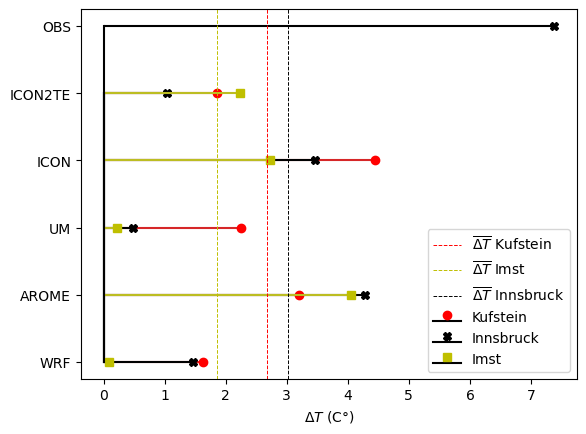

In [10]:
plt.stem(only_model, T_max_k - T_surf_k, 'tab:red', markerfmt='ro', basefmt='k',
         label=r'Kufstein', orientation='horizontal')
plt.stem(model, T_max - T_surf, 'k', markerfmt='kX', basefmt='k',
         label=r'Innsbruck', orientation='horizontal')
plt.stem(only_model, T_max_i - T_surf_i, 'tab:olive', markerfmt='ys', basefmt='k',
         label=r'Imst', orientation='horizontal')
plt.axvline(np.mean(T_max_k - T_surf_k), ls = '--', color='r', label=r'$\overline{\Delta T}$ Kufstein', linewidth=.7)
plt.axvline(np.mean(T_max_i - T_surf_i), ls = '--', color='y', label=r'$\overline{\Delta T}$ Imst', linewidth=.7)
plt.axvline(np.mean(T_max - T_surf), ls = '--', color='k', label=r'$\overline{\Delta T}$ Innsbruck', linewidth=.7)

plt.xlabel('$\Delta T$ (C°)')
plt.legend();
plt.savefig(dir_PLOTS + "k_i/T_diff_ibk_k_i.svg")


In [11]:
lab_k=np.array(['Kufstein','_f','_f','_f','_f'])
lab_i=np.array(['Imst','_f','_f','_f','_f'])
lab_ibk=np.array(['Innsbruck','_f','_f','_f','_f','_f'])

In [12]:
N = np.zeros(6)
for i in range(6):
    N[i] = bv_freq(th_surf[i], th_max[i], z_surf[i], z_max[i])
ff_diff = np.zeros(6)
z_diff_max_surf = np.zeros(6)
ff_seg = np.zeros(6)
for i in range(6):
    z_diff_max_surf[i] = z_max[i]-z_surf[i]
    ff_seg[i] = ff_surfseg[i][-1]
    
    non_dim_m_H[i] = non_dim_m_h(N[i], z_diff_max_surf[i], ff_seg[i])
non_dim_m_H

array([34.54872143,  4.24247397,  1.50407811,  2.49278364,  2.15528794,
        8.2020669 ])

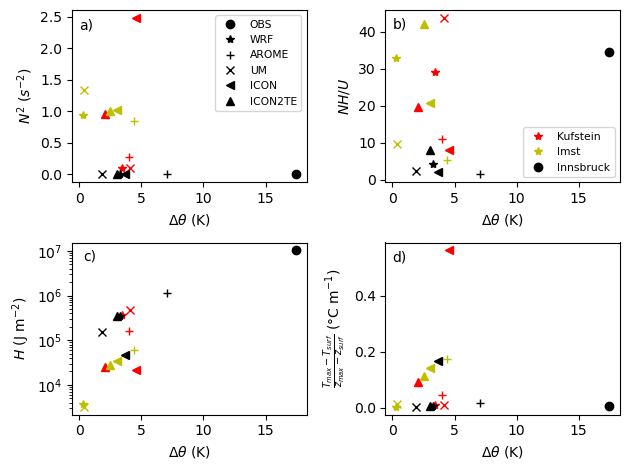

In [14]:
fig, ax = plt.subplots(2,2)

#N  
for i in range(5):
    l0 = ax[0,0].plot((th_max_k - th_surf_k).T.flatten()[i], (bv_max_k**2)[i], formen[i],
        color='r')
ax[0,0].set_xlabel(r'$\Delta\theta$ (K)')
ax[0,0].set_ylabel(r'$N^2$ (s$^{-2})$')
#ax[0,0].text(1.5, .0057, 'a)')

#NH/U
for i in range(5):
    l1 = ax[0,1].plot((th_max_k - th_surf_k).T.flatten()[i],non_dim_m_H_max_k[i], formen[i],
            color='r', label=lab_k[i])
ax[0,1].set_ylabel(r'$NH/U$')
ax[0,1].set_xlabel(r'$\Delta\theta$ (K)')
ax[0,1].legend(fontsize="7.75")

#valley heat def
for i in range(5):
    l2 = ax[1,0].plot((th_max_k - th_surf_k).T.flatten()[i],
                      valley_heat_def(T_surf_k, T_max_k, k_z_surf, k_z_max).magnitude[i], formen[i],
            color='r')
ax[1,0].set_ylabel(r'$H$ (J m$^{-2})$')
ax[1,0].set_xlabel(r'$\Delta\theta$ (K)')
#ax[1,0].text(1.5, 1e7-0.04*1e7, 'c)')

#bulk T grad
for i in range(5):
    l3 = ax[1,1].plot((th_max_k - th_surf_k).T.flatten()[i], 
                      ((T_max_k - T_surf_k) / (k_z_max - k_z_surf))[i], formen[i],
            color='r')
ax[1,1].set_ylabel(r'$\frac{T_1 - T_0}{z_1 - z_0}$ (°C m$^{-1})$')
ax[1,1].set_xlabel(r'$\Delta\theta$ (K)')
#ax[1,1].text(1.5,.157, 'd)')




#N  
for i in range(5):
    l0 = ax[0,0].plot((th_max_i - th_surf_i).T.flatten()[i], (bv_max_i**2)[i], formen[i],
        color='y')
ax[0,0].set_xlabel(r'$\Delta\theta$ (K)')
ax[0,0].set_ylabel(r'$N^2$ $(s^{-2})$')
ax[0,0].legend(fontsize="7.75")
#ax[0,0].text(1.5, .0057, 'a)')

#NH/U
for i in range(5):
    l1 = ax[0,1].plot((th_max_i - th_surf_i).T.flatten()[i],non_dim_m_H_max_i[i], formen[i],
            color='y', label=lab_i[i])
ax[0,1].set_ylabel(r'$NH/U$')
ax[0,1].set_xlabel(r'$\Delta\theta$ (K)')
ax[0,1].legend(fontsize="7.75", loc=2)
#ax[0,1].text(1.5, 3.3, 'b)')

#valley heat def
for i in range(5):
    l2 = ax[1,0].plot((th_max_i - th_surf_i).T.flatten()[i],
                      valley_heat_def(T_surf_i, T_max_i, i_z_surf, i_z_max).magnitude[i], formen[i],
            color='y')
ax[1,0].set_ylabel(r'$H$ (J m$^{-2})$')
ax[1,0].set_xlabel(r'$\Delta\theta$ (K)')
#ax[1,0].text(1.5, 1e7-0.04*1e7, 'c)')

#bulk T grad
for i in range(5):
    l3 = ax[1,1].plot((th_max_i - th_surf_i).T.flatten()[i], 
                      ((T_max_i - T_surf_i) / (i_z_max - i_z_surf))[i], formen[i],
            color='y')
ax[1,1].set_ylabel(r'$\frac{T_1 - T_0}{z_1 - z_0}$ (°C m$^{-1})$')
ax[1,1].set_xlabel(r'$\Delta\theta$ (K)')
#ax[1,1].text(1.5,.157, 'd)')







#N  
for i in range(6):
    l0 = ax[0,0].plot((th_max - th_surf).T.flatten()[i], (N**2)[i], formen_obs[i],
        color='k', label=model[i])
ax[0,0].set_xlabel(r'$\Delta\theta$ (K)')
ax[0,0].set_ylabel(r'$N^2$ $(s^{-2})$')
ax[0,0].legend(fontsize="7.75")
ax[0,0].text(0, 2.3, 'a)')

#NH/U
for i in range(6):
    l1 = ax[0,1].plot((th_max - th_surf).T.flatten()[i],non_dim_m_H[i], formen_obs[i],
            color='k', label=lab_ibk[i])
ax[0,1].set_ylabel(r'$NH/U$')
ax[0,1].legend(fontsize="7.75")
ax[0,1].set_xlabel(r'$\Delta\theta$ (K)')
ax[0,1].text(0, 41, 'b)')

#valley heat def
for i in range(6):
    l2 = ax[1,0].plot((th_max - th_surf).T.flatten()[i],valley_heat_def(T_surf, T_max, z_surf, z_max).magnitude[i], 
                      formen_obs[i], color='k')
ax[1,0].set_ylabel(r'$H$ (J m$^{-2})$')
ax[1,0].set_xlabel(r'$\Delta\theta$ (K)')
ax[1,0].text(.3, 1e7-0.4*1e7, 'c)')
ax[1,0].set_yscale('log')

#bulk T grad
for i in range(6):
    l3 = ax[1,1].plot((th_max - th_surf).T.flatten()[i], ((T_max - T_surf) / (z_max - z_surf))[i], formen_obs[i],
            color='k')
ax[1,1].set_ylabel(r'$\frac{T_{max} - T_{surf}}{z_{max} - z_{surf}}$ (°C m$^{-1})$')
ax[1,1].set_xlabel(r'$\Delta\theta$ (K)')
ax[1,1].text(0,.52, 'd)')



# ax[0,0].axline((0, 0), slope=1, ls='--', color='gray')
# ax[0,1].axline((0, 0), slope=1, ls='--', color='gray')
# ax[1,0].axline((0, 0), slope=1, ls='--', color='gray')
# ax[1,1].axline((0, 0), slope=1, ls='--', color='gray')

plt.tight_layout() #stop figures from overlapping
plt.show()
fig.savefig(dir_PLOTS + "/k_i/parameter_relations_k_i.svg")


In [17]:
ku = np.round(pd.DataFrame({'model': only_model,
                'N (s$^{-1}$)': bv_max_k,
              'NH/U': non_dim_m_H_max_k,
              'H (J m$^{-2}$)': valley_heat_def(T_surf_k, T_max_k, k_z_surf, k_z_max).magnitude,
              'Bulk T gradient (°C m$^{-1}$)': ((T_max_k - T_surf_k) / (k_z_max - k_z_surf))}), 3)
ku.to_excel("output4.xlsx")
ku

,model,N (s$^{-1}$),NH/U,H (J m$^{-2}$),Bulk T gradient (°C m$^{-1}$)
0,WRF,0.328,29.278,375499.808,0.009
1,AROME,0.532,11.126,162635.141,0.046
2,UM,0.323,43.776,463810.511,0.012
3,ICON,1.575,8.135,21541.560,0.561
4,ICON2TE,0.978,19.653,25574.438,0.091


In [18]:
im = np.round(pd.DataFrame({'model': only_model,
                'N (s$^{-1}$)': bv_max_i,
              'NH/U': non_dim_m_H_max_i,
              'H (J m$^{-2}$)': valley_heat_def(T_surf_i, T_max_i, i_z_surf, i_z_max).magnitude,
              'Bulk T gradient (°C m$^{-1}$)': ((T_max_i - T_surf_i) / (i_z_max - i_z_surf))}), 3)
im.to_excel("output5.xlsx")
im

,model,N (s$^{-1}$),NH/U,H (J m$^{-2}$),Bulk T gradient (°C m$^{-1}$)
0,WRF,0.971,32.926,3694.886,0.004
1,AROME,0.922,5.270,59417.986,0.175
2,UM,1.158,9.624,3221.891,0.015
3,ICON,1.008,20.709,34025.729,0.141
4,ICON2TE,1.005,42.001,28449.702,0.115


In [19]:
depth = pd.DataFrame({'model': only_model,
                      'p_surf [hPa]': k_p_surf,
                      'p_max [hPa]': k_p_max,
                      'p_diff_max_surf [hPa]': k_p_surf-k_p_max,
                      'z_surf [m]': k_z_surf,
                      'z_max [m]': k_z_max,
                      'z_diff_max_surf [m]': k_z_max-k_z_surf,
                      'p_surf_i [hPa]': i_p_surf,
                      'p_max_i [hPa]': i_p_max,
                      'p_diff_max_surf_i [hPa]': i_p_surf-i_p_max,
                      'z_surf_i [m]': i_z_surf,
                      'z_max_i [m]': i_z_max,
                      'z_diff_max_surf_i [m]': i_z_max-i_z_surf,
                        }).set_index('model')

In [20]:
valley_heat_def(T_surf, T_max, z_surf, z_max)

Magnitude,[10264194.122400012 355211.6721146054 1137628.1315055224 156534.9008232788 45733.930213084044 346469.2667395467]
Units,joule/meter2
